<a href="https://colab.research.google.com/github/poojasukhdeve-project/Sportify-Analysis/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify Data Analysis


### **Load the Dataset**


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/charts.csv')
df.head()

,date,country,position,streams,track_id,artists,artist_genres,duration,explicit,name
0,4/15/2021,de,82,625718,20IvMlpi4U5RuDnAlXSRiV,['Haftbefehl'],['german hip hop'],198746,False,Crackküche
1,1/31/2019,jp,171,50896,0V1K6MU0utODk4yNqZKsFv,['Suchmos'],"['japanese r&b', 'j-rock', 'japanese soul', 'j...",408320,False,WATER
2,11/15/2018,tr,59,185439,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
3,11/22/2018,tr,133,111159,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
4,11/29/2018,tr,166,96204,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen


In [35]:
df.dtypes # what type of data type is used

,0
date,object
country,object
position,int64
streams,int64
track_id,object
artists,object
artist_genres,object
duration,int64
explicit,bool
name,object


#### Check for Missing Values

In [46]:
print(df.isnull().sum()) # Shows how many missing values per columns
print(df.isnull().sum().sum()) # Shows total number of missing values

date             0
country          0
position         0
streams          0
track_id         0
artists          0
artist_genres    0
duration         0
explicit         0
name             0
dtype: int64
0


##### Check for duplicate rows


In [49]:
df_temp = df.copy()
for col in df_temp.columns:
    if df_temp[col].apply(type).eq(list).any():
        df_temp[col] = df_temp[col].apply(str)

# Now check for duplicates
duplicates = df_temp.duplicated()
print(duplicates.sum())  # Number of duplicate rows


0


In [50]:
non_list_columns = ['date', 'country', 'position', 'streams', 'track_id', 'duration', 'explicit', 'name']
duplicates = df.duplicated(subset=non_list_columns)
print(duplicates.sum())


0


##### Check for inconsistent Data

In [52]:
for col in df.select_dtypes(include='object'):
    if df[col].apply(type).eq(list).any():
        print(f"Skipping column '{col}' (contains lists)")
    else:
        print(f"Unique values in {col}:\n{df[col].unique()}\n")


Unique values in country:
['de' 'jp' 'tr' 'co' 'hu' 'hk' 'fi' 'at' 'eg' 'dk' 'sg' 'global' 'us' 'br'
 'ph' 'it' 'tw' 'ar' 'se' 'my' 'pt' 'cl' 'no' 'ch' 'ca' 'cz' 'mx' 'lv'
 'gr' 'lt' 'ee' 'pe' 'sk' 'bg' 'mt' 'cr' 'uy' 'sv' 'py' 'ec' 'bo' 'il'
 'in' 'gb' 'nl' 'za' 'pl' 'ro' 'be' 'fr' 'ru' 'ua' 'au' 'es' 'ie' 'nz'
 'is' 'id' 'gt' 'lu' 'vn' 'pa' 'hn' 'ni' 'do' 'th' 'cy' 'ae' 'kr' 'sa'
 'ma' 'ad' 'ng' 'kz' 'pk' 'by' 've']

Unique values in track_id:
['20IvMlpi4U5RuDnAlXSRiV' '0V1K6MU0utODk4yNqZKsFv'
 '4qzZm5EIdFurBpDieEmVc9' ... '4jrnQI2AXsY6EEpTAxGNGx'
 '7zcI33S1GCNPpEC2dKacsX' '1icRHA6kFSipRbZREQPaA0']

Skipping column 'artists' (contains lists)
Skipping column 'artist_genres' (contains lists)
Unique values in name:
['Crackküche' 'WATER' 'Gözleri Aşka Gülen' ... 'Ég Er Farinn' 'Galerie'
 'Valhalla']



In [53]:
list_columns = [col for col in df.columns if df[col].apply(type).eq(list).any()]
print("Columns containing lists:", list_columns)

Columns containing lists: ['artists', 'artist_genres']


##### Check Datatype

In [54]:
print(df.dtypes)

date             datetime64[ns]
country                  object
position                  int64
streams                   int64
track_id                 object
artists                  object
artist_genres            object
duration                  int64
explicit                   bool
name                     object
dtype: object


#### Look for Outliers (optional, for numeric columns)

In [55]:
print(df.describe())

                                date      position       streams      duration
count                        1048575  1.048575e+06  1.048575e+06  1.048575e+06
mean   2018-12-30 05:36:48.408554496  9.705366e+01  3.102183e+05  2.148016e+05
min              2013-04-28 00:00:00  1.000000e+00  0.000000e+00  0.000000e+00
25%              2016-12-22 00:00:00  4.400000e+01  1.285900e+04  1.885600e+05
50%              2019-02-14 00:00:00  9.500000e+01  4.538900e+04  2.116000e+05
75%              2021-02-11 00:00:00  1.480000e+02  1.830540e+05  2.360010e+05
max              2023-04-06 00:00:00  3.440000e+02  7.846090e+07  7.963609e+06
std                              NaN  5.938284e+01  1.307167e+06  4.569495e+04


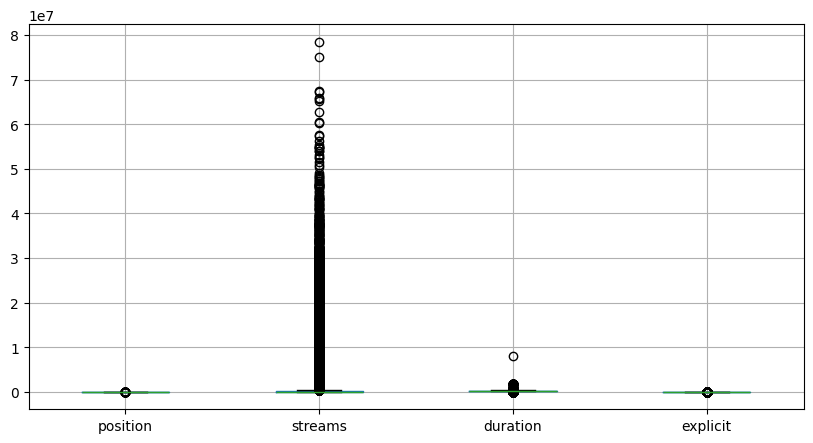

In [56]:
import matplotlib.pyplot as plt

df.boxplot(figsize=(10, 5))
plt.show()

#### Visualize Histograms (Better than Boxplot for Skewed Data)

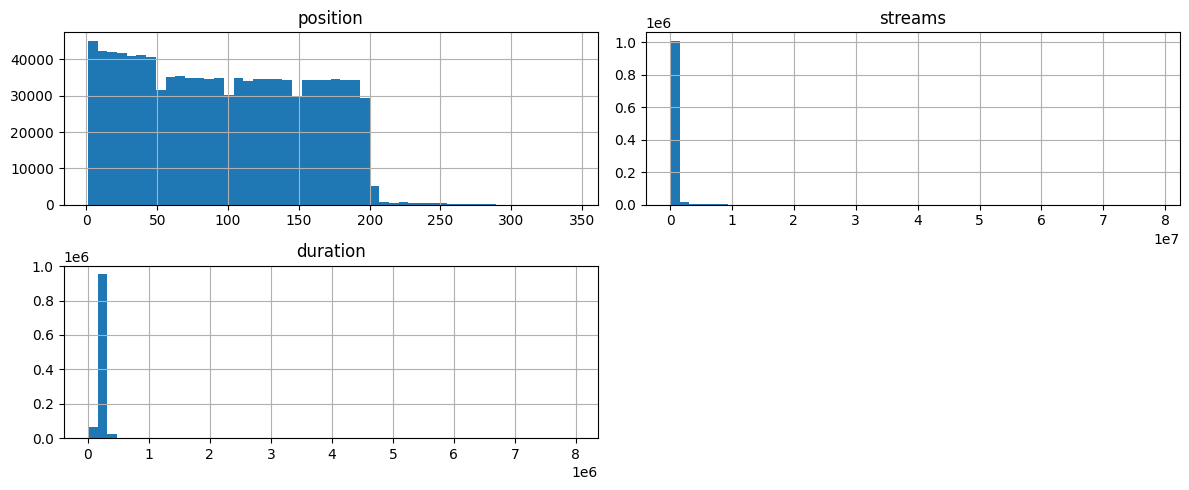

In [59]:
import matplotlib.pyplot as plt

numeric_cols = ['position', 'streams', 'duration']
df[numeric_cols].hist(bins=50, figsize=(12, 5))
plt.tight_layout()
plt.show()


#### Detect Outliers Using IQR Method

In [62]:
def detect_outliers_iqr(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

# Example: detect outliers in 'Position'
outliers_position = detect_outliers_iqr('position')
print(f"Number of outliers in 'Position': {len(outliers_position)}")

Number of outliers in 'streams': 60


In [65]:
def detect_outliers_iqr(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

# Example: detect outliers in 'Duration'
outliers_duration = detect_outliers_iqr('duration')
print(f"Number of outliers in 'duration': {len(outliers_duration)}")

Number of outliers in 'duration': 36182


In [64]:
def detect_outliers_iqr(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

# Example: detect outliers in 'streams'
outliers_streams = detect_outliers_iqr('streams')
print(f"Number of outliers in 'streams': {len(outliers_streams)}")

Number of outliers in 'streams': 128489


##### Option A: Remove outliers: Removes those rows completely.

In [66]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

df_cleaned = df.copy()
for col in ['streams', 'duration', 'position']:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

##### Option B: Cap outliers (winsorize): Replaces extreme values with boundary limits instead of removing them.

In [67]:
def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
    return df

df_capped = df.copy()
for col in ['streams', 'duration', 'position']:
    df_capped = cap_outliers_iqr(df_capped, col)


In [69]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Make a clean copy
df_cleaned = df.copy()

# Remove outliers from all relevant columns
for col in ['position', 'streams', 'duration']:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)


In [70]:
print("Original dataset size :", len(df))
print("Cleaned dataset size  :", len(df_cleaned))

Original dataset size : 1048575
Cleaned dataset size  : 887331


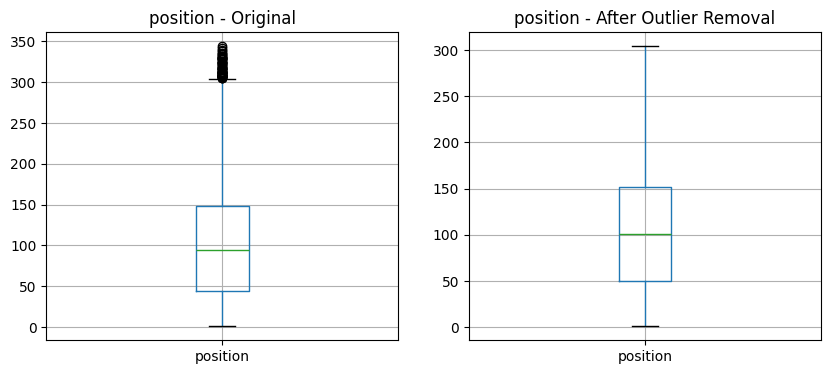

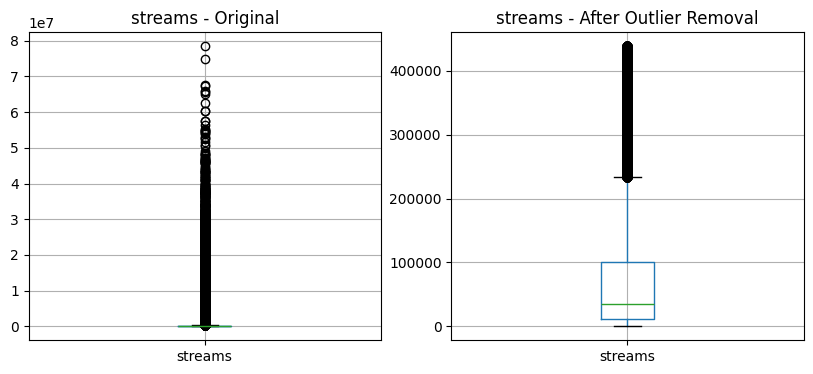

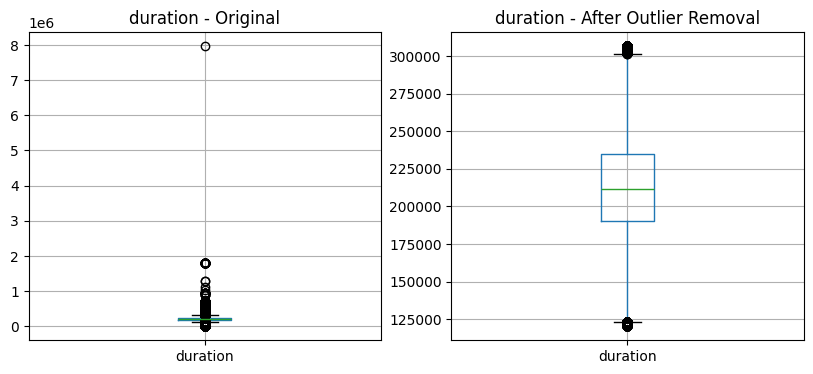

In [71]:
import matplotlib.pyplot as plt

def compare_boxplots(original_df, cleaned_df, cols):
    for col in cols:
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        original_df.boxplot(column=col)
        plt.title(f"{col} - Original")

        plt.subplot(1, 2, 2)
        cleaned_df.boxplot(column=col)
        plt.title(f"{col} - After Outlier Removal")

        plt.show()

# Compare all three
compare_boxplots(df, df_cleaned, ['position', 'streams', 'duration'])

1. Trends & Popularity Analysis
Top Songs Over Time: Line chart showing the most streamed songs over different dates.?